In [11]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [3]:
table_width = 201
sensor_model_table = np.empty((table_width, table_width))
alpha_hit = 0.74
alpha_short = 0.07
alpha_max = 0.07
alpha_rand = 0.12
sigma_hit = 8.0

In [4]:
z_max = table_width - 1
for d in range(table_width):
    hit_unnormalized = np.zeros(table_width)
    for z_ki in range(table_width):
        hit_unnormalized[z_ki] = (1/np.sqrt(2*np.pi*sigma_hit) * np.exp(-(z_ki-d)**2/(2*sigma_hit**2)))
        p_short = alpha_short * (2/d * (1-z_ki/d)) if (z_ki <= d and d != 0) else 0
        p_max = alpha_max if (z_ki == z_max) else 0
        p_rand = alpha_rand/z_max
        sensor_model_table[d, z_ki] = p_short + p_max + p_rand
    p_hits = alpha_hit * hit_unnormalized / np.sum(hit_unnormalized)
    sensor_model_table[d] += p_hits
    sensor_model_table[d] /= np.sum(sensor_model_table[d])

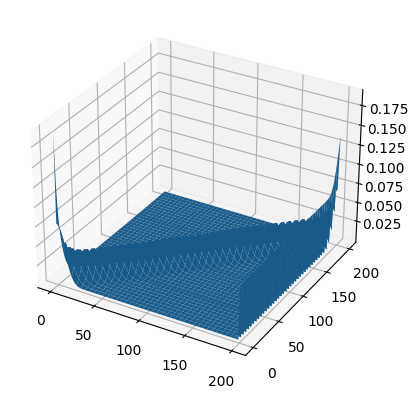

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(range(table_width), range(table_width))
ax.plot_surface(x, y, sensor_model_table)